<a href="https://colab.research.google.com/github/solenerichard69/Supervised_learning/blob/main/Final_project_Predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:#ED7D31"> Import librairies : </span> 

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
import datetime #For tensor board logs
from sklearn.model_selection import KFold

## <span style="color:#ED7D31"> Load dataset : </span> 

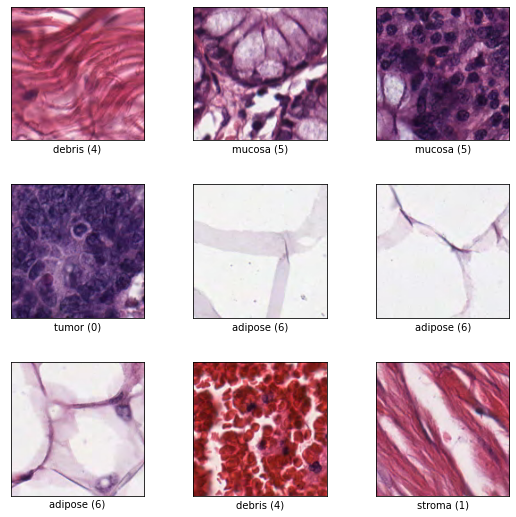

In [45]:
ds, ds_info = tfds.load('colorectal_histology', split='train', with_info=True)
fig = tfds.show_examples(ds, ds_info)

In [26]:
ds_train, ds_val, ds_test= tfds.load('colorectal_histology', split='train[:80%]', as_supervised = True),tfds.load('colorectal_histology', split='train[80%:90%]', as_supervised = True),tfds.load('colorectal_histology', split='train[90%:]', as_supervised = True)

In [21]:
ex=ds_train.take(10)
for image, label in ex:  # example is (image, label)
  print(image.shape) #check shape
  #print(image) #check pixel range

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


In [36]:
ds_full= tfds.load('colorectal_histology', split='train[:100%]', as_supervised = True)

In [47]:
ds_f=tfds.as_dataframe(ds.take(5000), ds_info)
ds_f.dtypes
X=ds_f.iloc[:,1:2].values #image
Y=ds_f.iloc[:,2:3].values #labels

In [7]:
def resize_normalize_image(image,label) :
  im_size=64  
  return(tf.image.resize(image,[im_size,im_size])/255 , label)

In [37]:
ds_train = ds_train.map(resize_normalize_image).batch(50)
ds_test = ds_test.map(resize_normalize_image).batch(50)
ds_val = ds_val.map(resize_normalize_image).batch(50)
#ds_full=ds_full.map(resize_normalize_image).batch(50)

In [38]:
def get_X (ds):
  list_X=[]
  for image,label in ds:
    im=image.numpy()
    list_X.append(im)
  return list_X

def get_y (ds):
  list_y=[]
  for image,label in ds:
    lab=label.numpy()
    list_y.append(lab)
  return list_y

In [10]:
X_train=get_X(ds_train)
y_train=get_y(ds_train)

In [39]:
#X=get_X(ds_full)
#Y=get_y(ds_full)

In [61]:
'''
model = keras.Sequential([
    layers.Conv2D(64, (3 ,3), input_shape=(64,64,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3 ,3), input_shape=(150,150,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3 ,3), input_shape=(150,150,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax'),

])

p_optimizer='SGD'
p_loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
p_metrics=['accuracy']
model.compile(optimizer=p_optimizer, loss=p_loss, metrics=p_metrics)'''

In [84]:
def create_model():
	# create model
  model = keras.Sequential([
    layers.Conv2D(64, (3 ,3), input_shape=(64,64,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3 ,3), input_shape=(150,150,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3 ,3), input_shape=(150,150,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax'),
  ])
	# Compile model
  p_optimizer='SGD'
  p_loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  p_metrics=['accuracy']
  model.compile(optimizer=p_optimizer, loss=p_loss, metrics=p_metrics)
  return model

In [75]:
#model.summary()


## Grid search:


In [87]:
#pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import sklearn
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [90]:
model = KerasClassifier(model=create_model, verbose=1)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y, error_score='raise')

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
54 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py", l

AttributeError: ignored

In [91]:
model = KerasClassifier(model=create_model, verbose=1)
# define the grid search parameters
batch_size = [16, 32, 64, 128]
epochs = [50,75,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y, error_score='raise')

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/scikeras/wrappers.py", l

AttributeError: ignored

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Cross validation

## EPOCHS + PLOT

In [153]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [154]:
nb_epochs=50
model_history=model.fit(ds_train, epochs=nb_epochs,validation_data=ds_val,callbacks=[tensorboard_callback])

Epoch 1/50
80/80 [==============================] - 34s 423ms/step - loss: 2.0560 - accuracy: 0.1435 - val_loss: 2.0042 - val_accuracy: 0.1360
Epoch 2/50
80/80 [==============================] - 30s 376ms/step - loss: 1.9435 - accuracy: 0.2083 - val_loss: 1.7772 - val_accuracy: 0.2880
Epoch 3/50
80/80 [==============================] - 30s 372ms/step - loss: 1.7252 - accuracy: 0.2808 - val_loss: 1.5532 - val_accuracy: 0.2920
Epoch 4/50
80/80 [==============================] - 30s 373ms/step - loss: 1.6063 - accuracy: 0.2973 - val_loss: 1.5120 - val_accuracy: 0.2940
Epoch 5/50
80/80 [==============================] - 30s 380ms/step - loss: 1.5411 - accuracy: 0.3133 - val_loss: 1.4522 - val_accuracy: 0.3040
Epoch 6/50
80/80 [==============================] - 30s 375ms/step - loss: 1.4639 - accuracy: 0.3435 - val_loss: 1.3959 - val_accuracy: 0.3520
Epoch 7/50
80/80 [==============================] - 30s 374ms/step - loss: 1.4527 - accuracy: 0.3515 - val_loss: 1.3623 - val_accuracy: 0.3780

In [155]:
y_prediction=model.predict(ds_test)
y_prediction

10/10 [==============================] - 1s 119ms/step


array([[2.14965716e-02, 1.12521790e-01, 5.36268912e-02, ...,
        3.76985550e-01, 5.15107624e-03, 9.16423414e-06],
       [3.36966306e-01, 7.52734977e-08, 8.17480963e-04, ...,
        2.21580360e-03, 7.55605800e-09, 9.95549754e-10],
       [5.93637824e-01, 1.07662578e-04, 1.26206055e-02, ...,
        3.10064554e-01, 4.25396283e-05, 4.28862495e-06],
       ...,
       [2.72861242e-01, 3.12971533e-03, 2.38184258e-01, ...,
        2.15604499e-01, 5.61257839e-05, 1.85789065e-06],
       [2.17740797e-02, 1.59724250e-01, 6.95187509e-01, ...,
        2.85181291e-02, 5.73808153e-04, 1.00839179e-05],
       [1.46981431e-04, 4.74055082e-01, 1.79500468e-02, ...,
        1.25772052e-03, 1.70398317e-03, 1.47028254e-06]], dtype=float32)

In [156]:
history_dict = model_history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


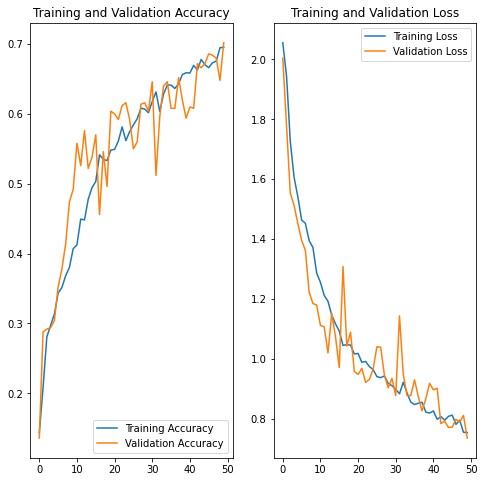

In [157]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(nb_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Tensorboard

In [131]:
%load_ext tensorboard
tensorboard_logdir = '/content/tensorboard/'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [111]:
#%tensorboard --logdir logs/fit